# Visualisations - Runtime

In [30]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os

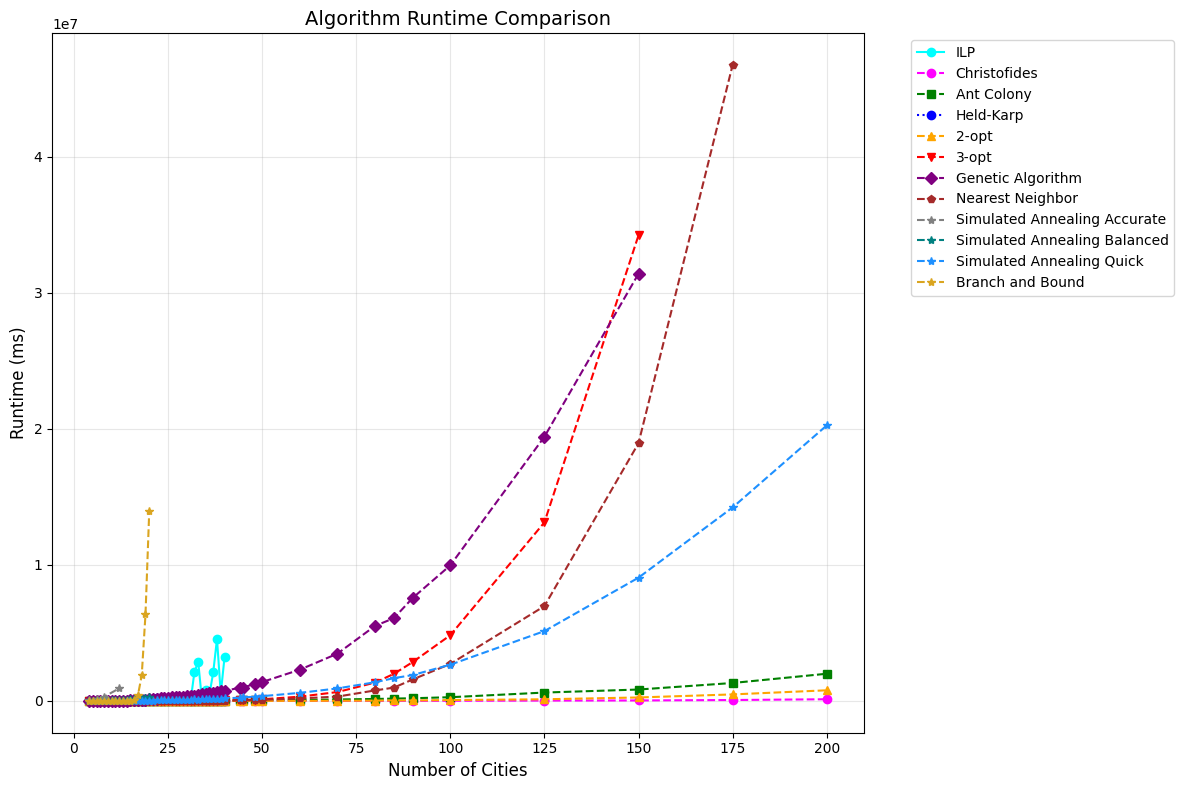

In [31]:
plt.figure(figsize=(12, 8))

# All algorithms and there paths
algorithms = {
    "ilp_results.csv": {"color": "cyan", "marker": "o", "linestyle": "-", "label": "ILP"},
    "christofides_results.csv": {"color": "magenta", "marker": "o", "linestyle": "--", "label": "Christofides"},
    "aco_results.csv": {"color": "green", "marker": "s", "linestyle": "--", "label": "Ant Colony"},
    "held_karp_results.csv": {"color": "blue", "marker": "o", "linestyle": ":", "label": "Held-Karp"},
    "2opt_results.csv": {"color": "orange", "marker": "^", "linestyle": "--", "label": "2-opt"},
    "3opt_results.csv": {"color": "red", "marker": "v", "linestyle": "--", "label": "3-opt"},
    "ga_results.csv": {"color": "purple", "marker": "D", "linestyle": "--", "label": "Genetic Algorithm"},
    "nearest_neighbour_results.csv": {"color": "brown", "marker": "p", "linestyle": "--", "label": "Nearest Neighbor"},
    "sa_results.csv": {"color": "gray", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Accurate"},
    "sa_balanced_results.csv": {"color": "teal", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Balanced"},
    "sa_quick_results.csv": {"color": "dodgerblue", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Quick"},
    "branch_and_bound_results.csv": {"color": "goldenrod", "marker": "*", "linestyle": "--", "label": "Branch and Bound"}
}

# Plotting each of the algorithm's results
for filename, style in algorithms.items():
    if os.path.exists(filename):
        # sort ascending
        df = pd.read_csv(filename).sort_values('cities')
        plt.plot(df['cities'], df['runtime_ms'], 
                color=style["color"],
                marker=style["marker"],
                linestyle=style["linestyle"],
                label=style["label"])

# plot configs
plt.title('Algorithm Runtime Comparison', fontsize=14)
plt.xlabel('Number of Cities', fontsize=12)
plt.ylabel('Runtime (ms)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.grid(True, alpha=0.3)
plt.tight_layout()  # tight layout
plt.show()

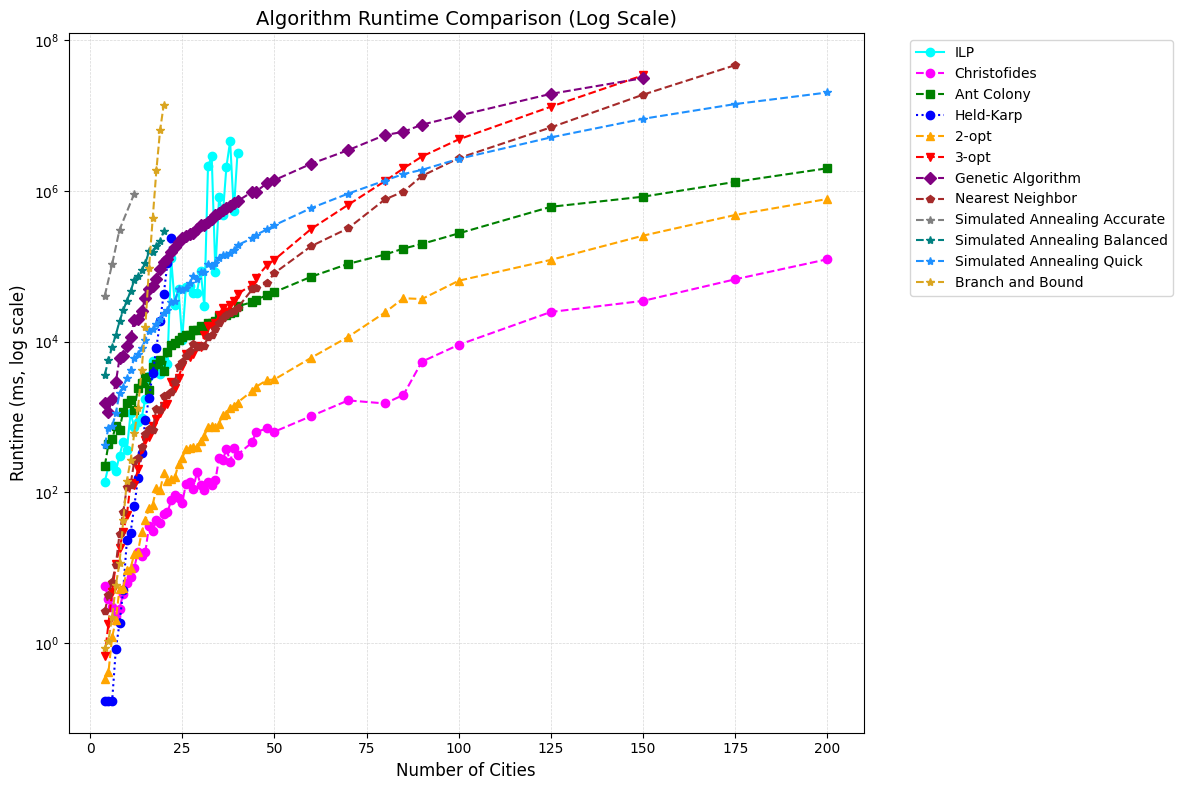

In [33]:
plt.figure(figsize=(12, 8))

# All algorithms and there paths
algorithms = {
    "ilp_results.csv": {"color": "cyan", "marker": "o", "linestyle": "-", "label": "ILP"},
    "christofides_results.csv": {"color": "magenta", "marker": "o", "linestyle": "--", "label": "Christofides"},
    "aco_results.csv": {"color": "green", "marker": "s", "linestyle": "--", "label": "Ant Colony"},
    "held_karp_results.csv": {"color": "blue", "marker": "o", "linestyle": ":", "label": "Held-Karp"},
    "2opt_results.csv": {"color": "orange", "marker": "^", "linestyle": "--", "label": "2-opt"},
    "3opt_results.csv": {"color": "red", "marker": "v", "linestyle": "--", "label": "3-opt"},
    "ga_results.csv": {"color": "purple", "marker": "D", "linestyle": "--", "label": "Genetic Algorithm"},
    "nearest_neighbour_results.csv": {"color": "brown", "marker": "p", "linestyle": "--", "label": "Nearest Neighbor"},
    "sa_results.csv": {"color": "gray", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Accurate"},
    "sa_balanced_results.csv": {"color": "teal", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Balanced"},
    "sa_quick_results.csv": {"color": "dodgerblue", "marker": "*", "linestyle": "--", "label": "Simulated Annealing Quick"},
    "branch_and_bound_results.csv": {"color": "goldenrod", "marker": "*", "linestyle": "--", "label": "Branch and Bound"}
}

# Plotting each of the algorithm's results
for filename, style in algorithms.items():
    if os.path.exists(filename):
        # sort ascending
        df = pd.read_csv(filename).sort_values('cities')
        plt.plot(df['cities'], df['runtime_ms'], 
                 color=style["color"],
                 marker=style["marker"],
                 linestyle=style["linestyle"],
                 label=style["label"])

# plot but its log scale
plt.title('Algorithm Runtime Comparison (Log Scale)', fontsize=14)
plt.xlabel('Number of Cities', fontsize=12)
plt.ylabel('Runtime (ms, log scale)', fontsize=12)
plt.yscale('log')  # <-- Set y-axis to logarithmic scale
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

# Table Of Best Algorithms after Cities 23+

In [34]:
from IPython.display import display

#  each of the algorithm's results
algorithm_files = {
    'Held-Karp': 'held_karp_results.csv',
    'Branch & Bound': 'branch_and_bound_results.csv',
    'Christofides': 'christofides_results.csv',
    '2-opt': '2opt_results.csv',
    '3-opt': '3opt_results.csv',
    'Genetic': 'ga_results.csv',
    'Ant Colony': 'aco_results.csv',
    'Simulated Annealing Accurate': 'sa_results.csv',
    'Simulated Annealing Balanced': 'sa_balanced_results.csv',
    'Simulated Annealing Quick': 'sa_quick_results.csv',
    'ILP': 'ilp_results.csv',
    'Nearest Neighbor': 'nearest_neighbour_results.csv',
}

# combined dataframe
results = []
for algo, file in algorithm_files.items():
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Algorithm'] = algo
        results.append(df[['cities', 'distance', 'Algorithm']])
        
if not results:
    print("No result files found!")
else:
    combined_df = pd.concat(results)
    
    # For cities 23-200 since 4-23 doesn't matter as much since all algorithms have perfect answers for it (most cases)
    filtered_df = combined_df[(combined_df['cities'] >= 3) & (combined_df['cities'] <= 200)]
    
    if filtered_df.empty:
        print("No data available for cities 23-200")
    else:
        # Find best distance for each city size
        best_distances = filtered_df.groupby('cities')['distance'].min().reset_index()
        
        # winning algorithm(s)
        best_algorithms = pd.merge(
            filtered_df, 
            best_distances, 
            on=['cities', 'distance']
        ).groupby('cities').agg({
            'distance': 'first',
            'Algorithm': lambda x: list(x)  # Keep as list for comparison
        }).reset_index()
        
        # Get all algorithms that ran for each city size
        all_runs = filtered_df.groupby('cities')['Algorithm'].apply(list).reset_index()
        all_runs.columns = ['cities', 'all_algorithms']
        
        # comparison table
        comparison = pd.merge(best_algorithms, all_runs, on='cities')
        
        # Calculate all the algorithms that were beaten
        def find_beaten(row):
            winning_algs = row['Algorithm']
            all_algs = row['all_algorithms']
            beaten = []
            
            # For each algorithm that ran for this city size
            for alg in set(all_algs):
                # Get all distances for this algorithm
                alg_distances = filtered_df[(filtered_df['cities'] == row['cities']) & 
                                          (filtered_df['Algorithm'] == alg)]['distance']
                
                # If any are worse than the best dist
                if len(alg_distances) > 0 and min(alg_distances) > row['distance']:
                    beaten.append(alg)
            
            return ', '.join(beaten) if beaten else 'NONE'
        
        comparison['Beaten Algorithms'] = comparison.apply(find_beaten, axis=1)
        comparison['Algorithm'] = comparison['Algorithm'].apply(lambda x: ', '.join(x))
        
        # complete city list and merge
        all_cities = pd.DataFrame({'cities': range(23, 201)})
        final_results = pd.merge(
            all_cities,
            comparison[['cities', 'distance', 'Algorithm', 'Beaten Algorithms']],
            on='cities',
            how='left'
        ).fillna({'distance': 'NONE', 'Algorithm': 'NONE', 'Beaten Algorithms': 'NONE'})
        
        # Format - better display
        final_results.columns = ['City Size', 'Best Distance', 'Winning Algorithm(s)', 'Beaten Algorithms']
        final_results['Best Distance'] = final_results['Best Distance'].apply(
            lambda x: f"{x:.2f}" if x != 'NONE' else x)
        
        # readability
        print("Algorithm Performance Comparison (23-200 cities):")
        display(final_results.head(15))
        
        # saveing the results in a .csv file
        save_csv = input("\nSave full results to CSV? (y/n): ")
        if save_csv.lower() == 'y':
            final_results.to_csv('algorithm_comparison_23_200.csv', index=False)
            print("Saved to 'algorithm_comparison_23_200.csv'")

Algorithm Performance Comparison (23-200 cities):


,City Size,Best Distance,Winning Algorithm(s),Beaten Algorithms
0,23,2025.73,"Christofides, Genetic, Ant Colony, Simulated A...","3-opt, 2-opt"
1,24,2033.59,"Christofides, Genetic, Ant Colony, Simulated A...","3-opt, 2-opt"
2,25,2036.54,"Christofides, 3-opt, Genetic, Ant Colony, Simu...",2-opt
3,26,2044.28,"Christofides, 3-opt, Genetic, Ant Colony, Simu...",2-opt
4,27,2093.64,"Christofides, Genetic, Ant Colony, Simulated A...","3-opt, 2-opt"
5,28,2178.64,"Genetic, Ant Colony, Simulated Annealing Quick...","Christofides, 3-opt, 2-opt"
6,29,2238.88,"Genetic, Ant Colony, Simulated Annealing Quick...","Christofides, 3-opt, 2-opt"
7,30,2258.84,"3-opt, Genetic, Simulated Annealing Quick, ILP","Christofides, Ant Colony, 2-opt, Nearest Neighbor"
8,31,2271.01,"3-opt, Genetic, Simulated Annealing Quick, ILP","Christofides, Ant Colony, 2-opt, Nearest Neighbor"
9,32,2290.77,"2-opt, Genetic, Simulated Annealing Quick, ILP","Christofides, Ant Colony, 3-opt, Nearest Neighbor"



Save full results to CSV? (y/n): n


# Visualisation - Individual Performance & Heatmap

In [ ]:
# *Note: As exact algorithms cannot caluclate higher than 22 cities, this heatmap will compare their 
# "distance" result, against each other to find the best algorithm*

# ^ Before the addition of ILP

# Distance comparison for all cities


Visualisation 1: Algorithm Performance plots


<Figure size 1500x1000 with 0 Axes>

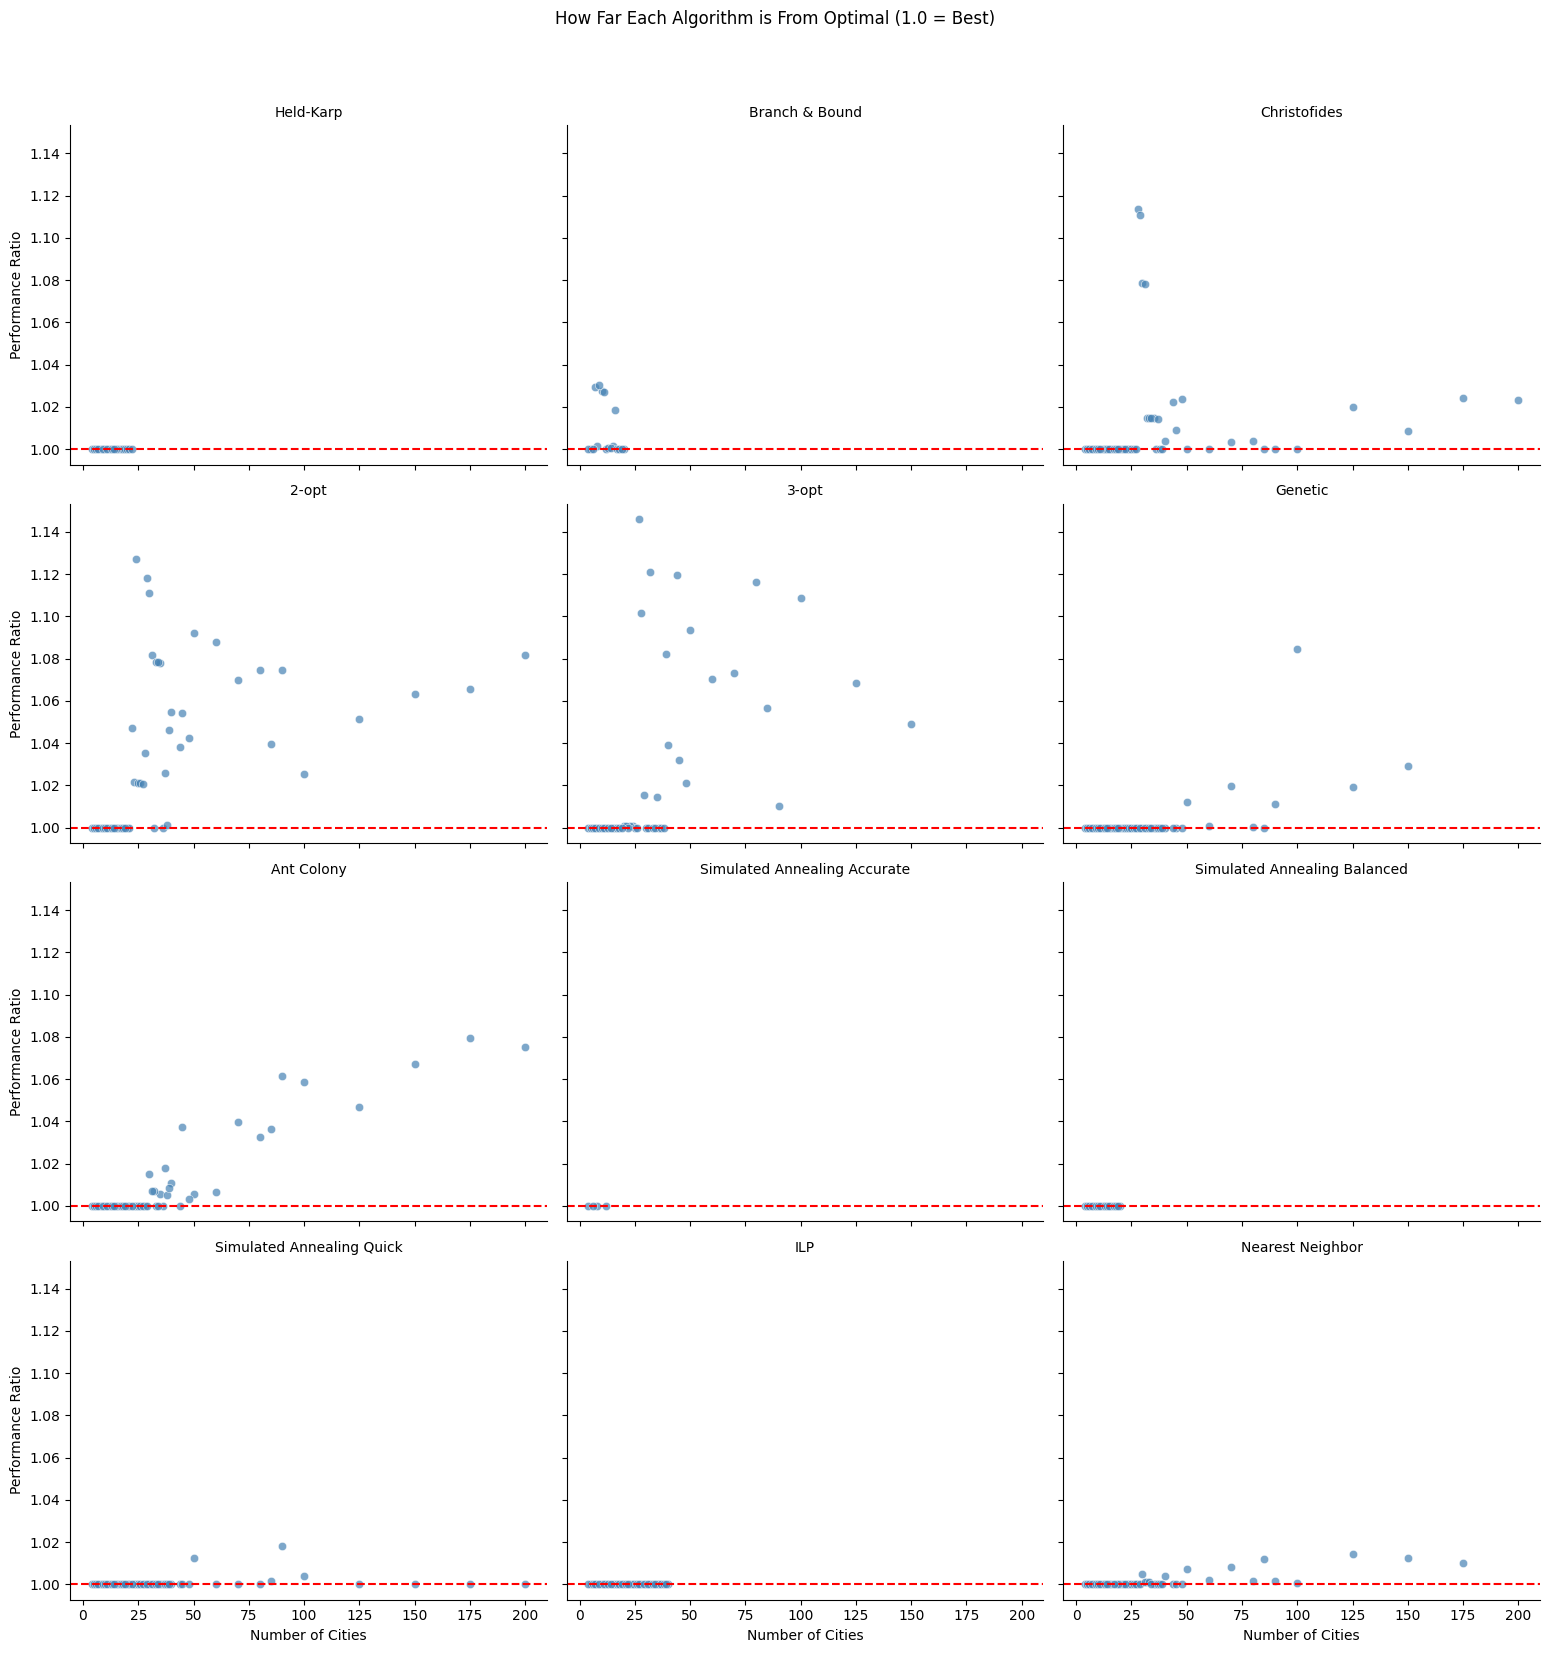


Visualisation 2: Performance Heatmap


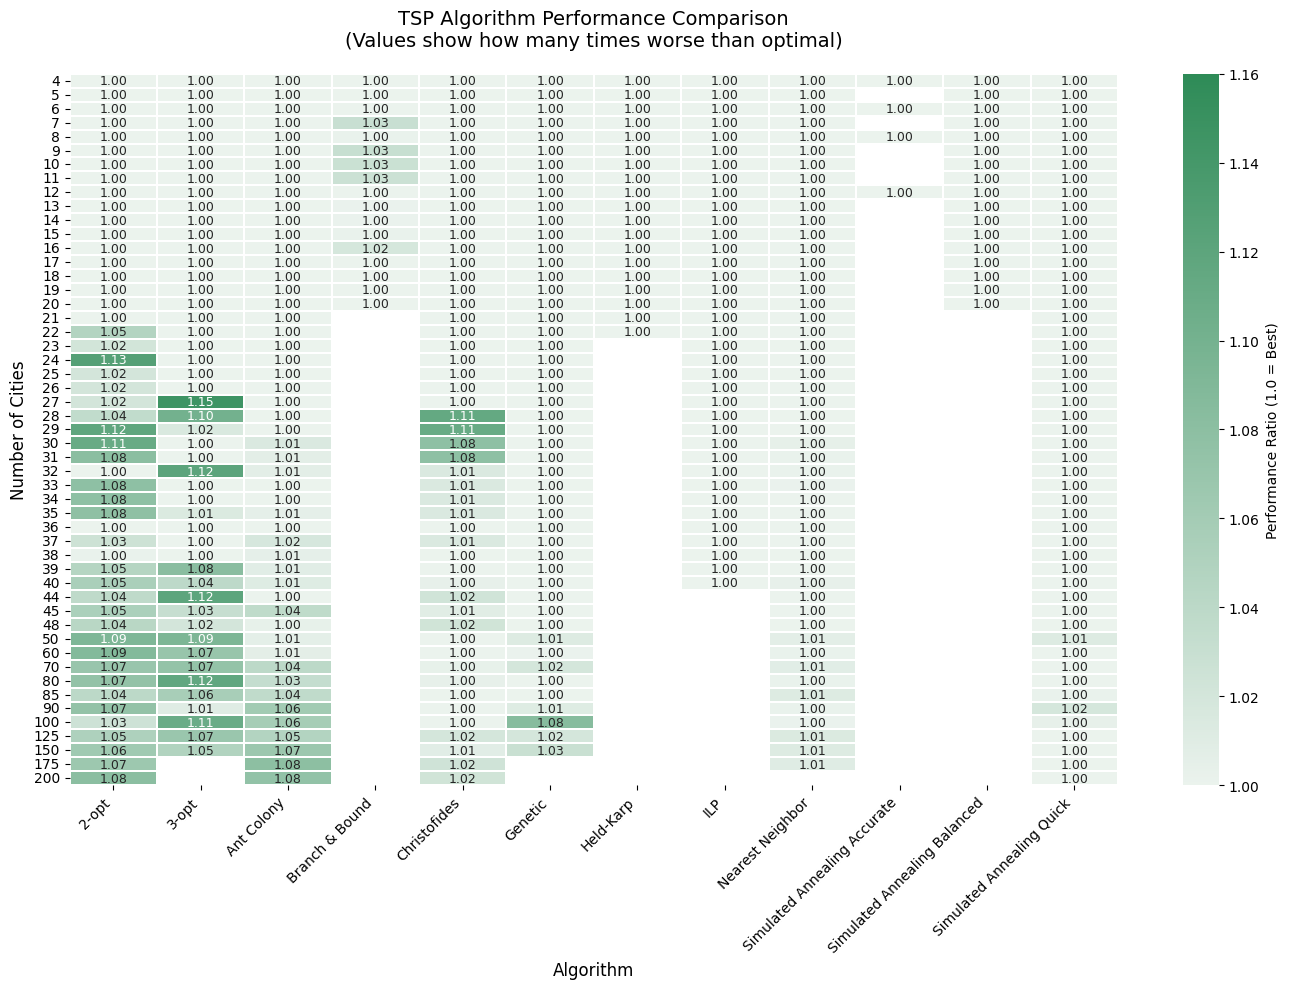

In [36]:
import seaborn as sns
from IPython.display import display

# loading and preparing the data
# algos
algorithm_files = {
    'Held-Karp': 'held_karp_results.csv',
    'Branch & Bound': 'branch_and_bound_results.csv',
    'Christofides': 'christofides_results.csv',
    '2-opt': '2opt_results.csv',
    '3-opt': '3opt_results.csv',
    'Genetic': 'ga_results.csv',
    'Ant Colony': 'aco_results.csv',
    'Simulated Annealing Accurate': 'sa_results.csv',
    'Simulated Annealing Balanced': 'sa_balanced_results.csv',
    'Simulated Annealing Quick': 'sa_quick_results.csv',
    'ILP': 'ilp_results.csv',
    'Nearest Neighbor': 'nearest_neighbour_results.csv',
}

results = []
for algo, file in algorithm_files.items():
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Algorithm'] = algo
        results.append(df[['cities', 'distance', 'Algorithm']])
        
if not results:
    print("no files")
else:
    combined_df = pd.concat(results)
    
    # Filters for cities 4-200
    filtered_df = combined_df[(combined_df['cities'] >= 4) & (combined_df['cities'] <= 200)].copy()
    
    if filtered_df.empty:
        print("No data")
    else:
        # Performance Ratio Facet Plot
        def plot_algorithm_facets(df):
            best_distances = df.groupby('cities')['distance'].min().reset_index()
            merged = df.merge(best_distances, on='cities', suffixes=('', '_best'))
            merged['performance_ratio'] = merged['distance'] / merged['distance_best']
            
            plt.figure(figsize=(15, 10))
            g = sns.FacetGrid(
                merged, 
                col='Algorithm', 
                col_wrap=3,
                height=4,
                aspect=1.3,
                sharey=True
            )
            g.map_dataframe(
                sns.scatterplot, 
                x='cities', 
                y='performance_ratio',
                alpha=0.7,
                color='steelblue'
            )
            g.map(plt.axhline, y=1, linestyle='--', color='red')
            g.set_titles("{col_name}")
            g.set_axis_labels("Number of Cities", "Performance Ratio")
            g.fig.suptitle('How Far Each Algorithm is From Optimal (1.0 = Best)', y=1.03)
            plt.tight_layout()
            plt.show()

        # Heatmap (v2)            
        def plot_enhanced_heatmap(df):
            # Get all cities that have at least one algorithm result
            cities_with_data = df['cities'].unique()
            cities_with_data.sort()

            # pivot table with all algorithms
            heatmap_data = df.pivot_table(
                index='cities',
                columns='Algorithm',
                values='distance',
                aggfunc='min'
            ).loc[cities_with_data]  #Only cities with data

            # calculate the performance ratio relative to the best algorithm
            rel_perf = heatmap_data.apply(lambda x: x/x.min(), axis=1)

            # custom green color palette
            green_palette = sns.light_palette("seagreen", as_cmap=True)

            plt.figure(figsize=(14, 10))
            sns.heatmap(
                rel_perf,
                cmap=green_palette,
                vmin=1,
                vmax=1.16,
                linewidths=0.3,
                linecolor='white',
                annot=True,
                fmt=".2f",
                annot_kws={'size': 9},
                cbar_kws={
                    'label': 'Performance Ratio (1.0 = Best)', 
                    'ticks': [1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16]
                }
            )

            plt.title('TSP Algorithm Performance Comparison\n(Values show how many times worse than optimal)', 
                      pad=20, fontsize=14)
            plt.xlabel('Algorithm', fontsize=12)
            plt.ylabel('Number of Cities', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

# Run with filtered data
if not filtered_df.empty:
    print("\nVisualisation 1: Algorithm Performance plots")
    plot_algorithm_facets(filtered_df)
    print("\nVisualisation 2: Performance Heatmap")
    plot_enhanced_heatmap(filtered_df)
else:
    print("No data")

# Distance comparison for cities 23+

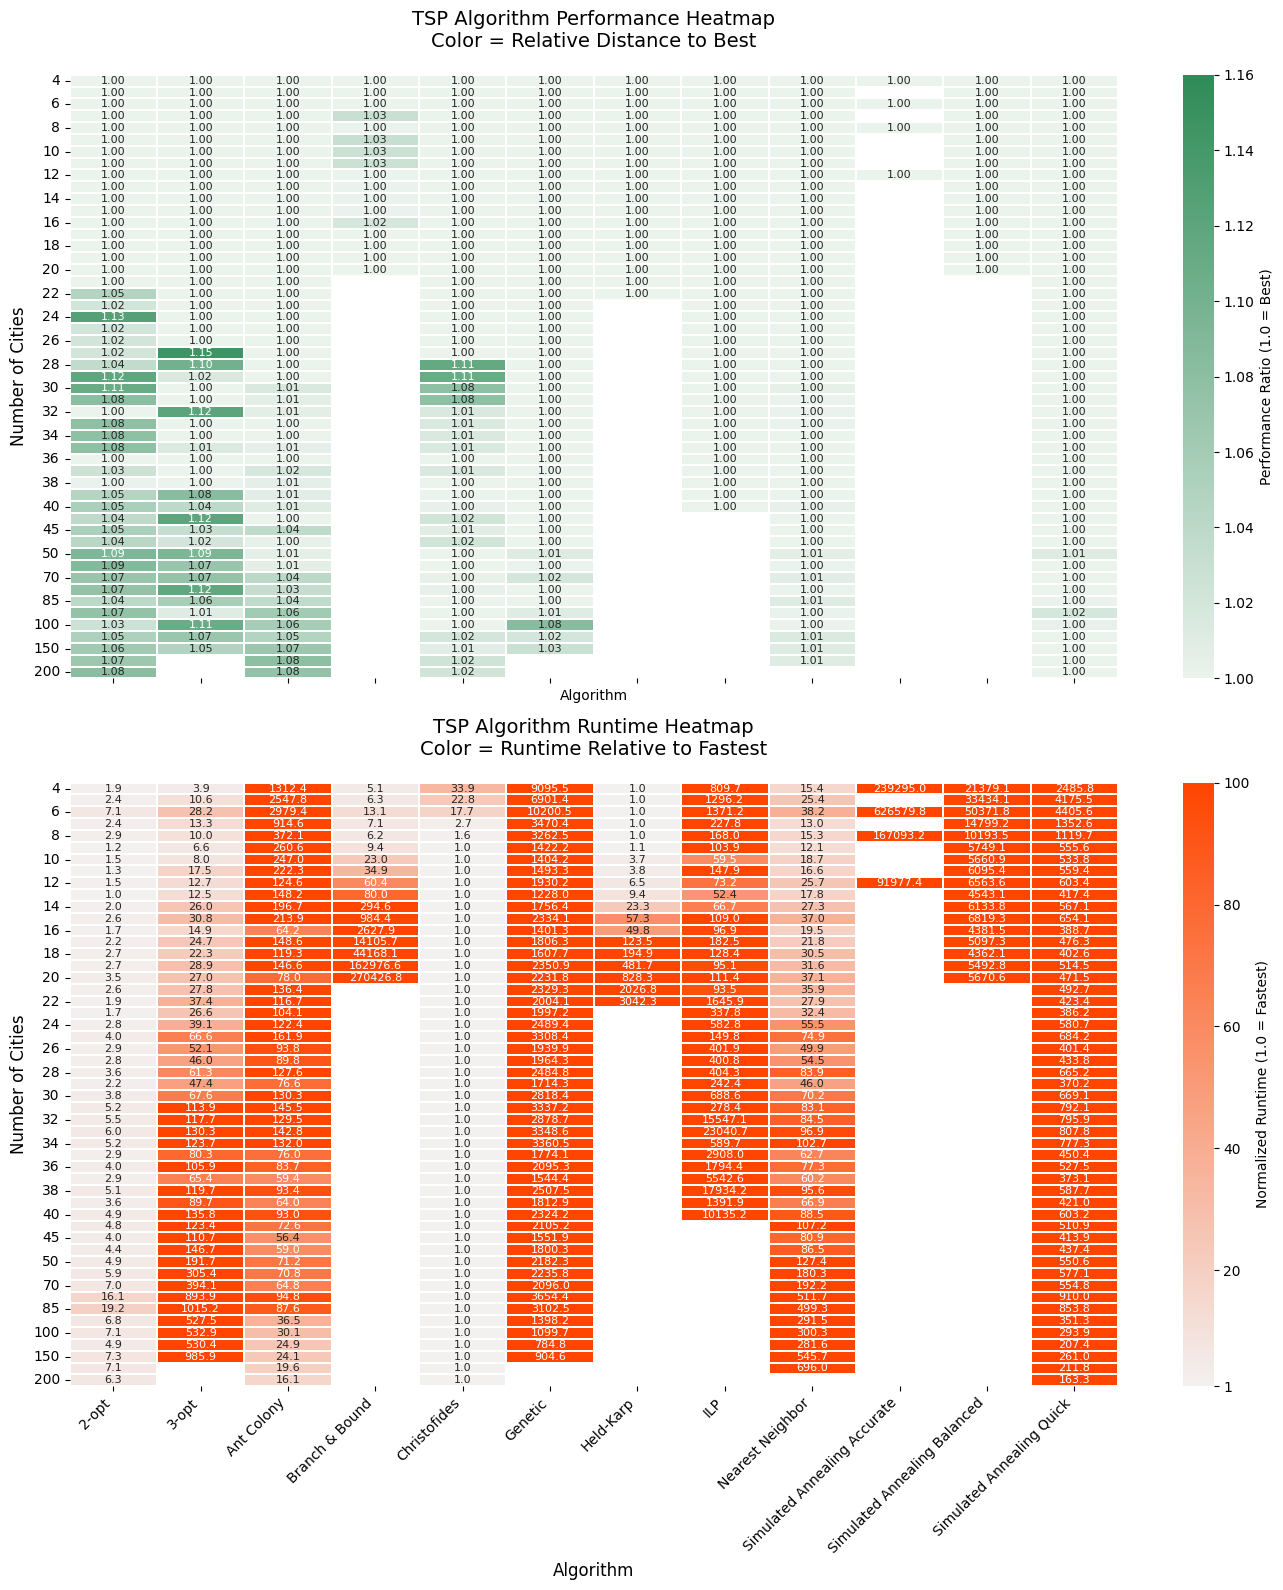

In [38]:
# libs separate
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
import os

# All algorithms and there paths
algorithm_files = {
    'Held-Karp': 'held_karp_results.csv',
    'Branch & Bound': 'branch_and_bound_results.csv',
    'Christofides': 'christofides_results.csv',
    '2-opt': '2opt_results.csv',
    '3-opt': '3opt_results.csv',
    'Genetic': 'ga_results.csv',
    'Ant Colony': 'aco_results.csv',
    'Simulated Annealing Accurate': 'sa_results.csv',
    'Simulated Annealing Balanced': 'sa_balanced_results.csv',
    'Simulated Annealing Quick': 'sa_quick_results.csv',
    'ILP': 'ilp_results.csv',
    'Nearest Neighbor': 'nearest_neighbour_results.csv',
}

results = []
runtime_results = []
for algo, file in algorithm_files.items():
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Algorithm'] = algo
        results.append(df[['cities', 'distance', 'Algorithm']])
        runtime_results.append(df[['cities', 'runtime_ms', 'Algorithm']])

if not results:
    print("No result")
else:
    combined_df = pd.concat(results)
    runtime_df = pd.concat(runtime_results)
    
    # Filter cities 23–200
    filtered_df = combined_df[(combined_df['cities'] >= 4) & (combined_df['cities'] <= 200)].copy()
    filtered_runtime = runtime_df[(runtime_df['cities'] >= 4) & (runtime_df['cities'] <= 200)].copy()

    if filtered_df.empty:
        print("No data")
    else:
        # 2. Combined Heatmap Plotting Function
        def plot_combined_heatmap(perf_df, runtime_df):
            cities_with_data = perf_df['cities'].unique()
            cities_with_data.sort()

            # Pivot tables
            perf_pivot = perf_df.pivot_table(
                index='cities', columns='Algorithm', values='distance', aggfunc='min'
            ).loc[cities_with_data]

            runtime_pivot = runtime_df.pivot_table(
                index='cities', columns='Algorithm', values='runtime_ms', aggfunc='mean'
            ).loc[cities_with_data]

            # Normalize for the color mapping stage
            rel_perf = perf_pivot.apply(lambda x: x / x.min(), axis=1)
            norm_runtime = runtime_pivot.apply(lambda x: x / x.min(), axis=1)

            # colors
            perf_cmap = sns.light_palette("seagreen", as_cmap=True)
            runtime_cmap = sns.light_palette("orangered", as_cmap=True)

            # Plot
            fig, (ax1, ax2) = plt.subplots(
                nrows=2, figsize=(14, 16), sharex=True,
                gridspec_kw={'height_ratios': [1, 1]}
            )

            sns.heatmap(
                rel_perf, ax=ax1, cmap=perf_cmap, vmin=1, vmax=1.16,
                linewidths=0.3, linecolor='white', annot=True, fmt=".2f",
                annot_kws={'size': 8},
                cbar_kws={'label': 'Performance Ratio (1.0 = Best)', 'ticks': [1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16]}
            )
            ax1.set_title('TSP Algorithm Performance Heatmap\nColor = Relative Distance to Best', pad=20, fontsize=14)
            ax1.set_ylabel('Number of Cities', fontsize=12)

            sns.heatmap(
                norm_runtime, ax=ax2, cmap=runtime_cmap, vmin=1, vmax=100,
                linewidths=0.3, linecolor='white', annot=True, fmt=".1f",
                annot_kws={'size': 8},
                cbar_kws={'label': 'Normalized Runtime (1.0 = Fastest)', 'ticks': [1, 20, 40, 60, 80, 100]}
            )
            ax2.set_title('TSP Algorithm Runtime Heatmap\nColor = Runtime Relative to Fastest', pad=20, fontsize=14)
            ax2.set_ylabel('Number of Cities', fontsize=12)
            ax2.set_xlabel('Algorithm', fontsize=12)

            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

        # heatmap
        plot_combined_heatmap(filtered_df, filtered_runtime)